In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Load the dataset (Replace 'diabetes_health_indicators.csv' with actual file)
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
df = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [7]:
# Display info 
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
def plot_outcome_by_group(df, group_column, outcome_column):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=group_column, y=outcome_column, ci=None, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.xlabel(group_column.capitalize())
    plt.ylabel(outcome_column.capitalize())
    plt.title(f'Diabetes Outcome by {group_column.capitalize()}')
    plt.show()

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_24836/3115474330.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group_column, y=outcome_column, ci=None, palette='coolwarm')


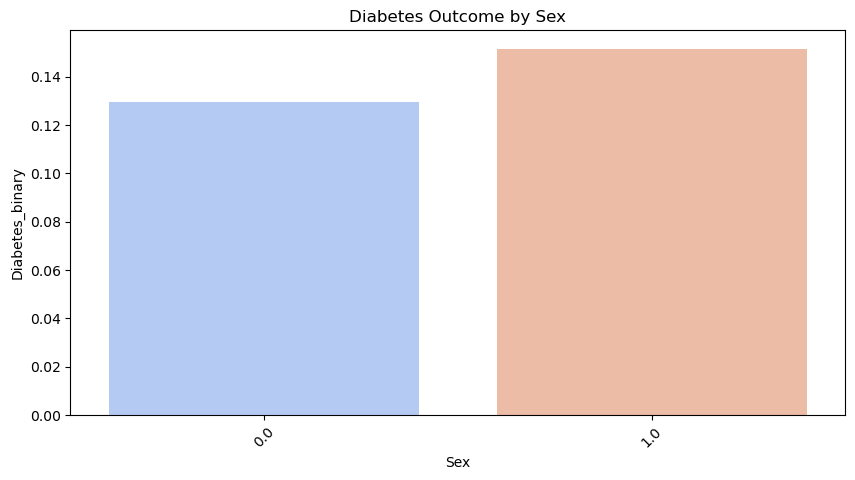

In [9]:
# visualizations
plot_outcome_by_group(df, 'Sex', 'Diabetes_binary')

Figure 1. This suggests 1=female show a higher diabetes prevalence than males. 

In [25]:
print(df['Sex'].value_counts())

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64


In [27]:
print(df.groupby('Sex')['Diabetes_binary'].mean())


Sex
0.0    0.129679
1.0    0.151603
Name: Diabetes_binary, dtype: float64


In [30]:
age_mapping = {
    1: '18-24',  2: '25-29',  3: '30-34',  4: '35-39',  5: '40-44',
    6: '45-49',  7: '50-54',  8: '55-59',  9: '60-64', 10: '65-69',
   11: '70-74', 12: '75-79', 13: '80+'
}

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_24836/3115474330.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group_column, y=outcome_column, ci=None, palette='coolwarm')


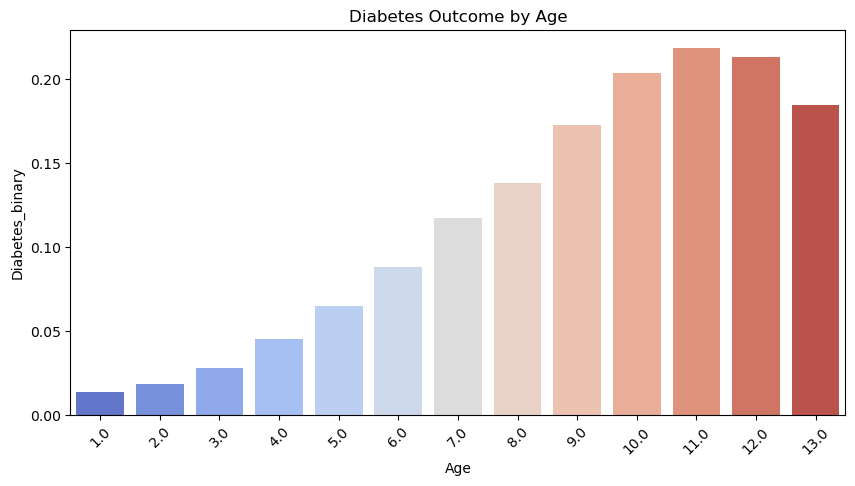

In [32]:
plot_outcome_by_group(df, 'Age', 'Diabetes_binary')

Figure 2: Shows the age groups that are more suceptible to diabetes based on their age and their colors get warmer as they are more suceptible. 

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_24836/3115474330.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group_column, y=outcome_column, ci=None, palette='coolwarm')


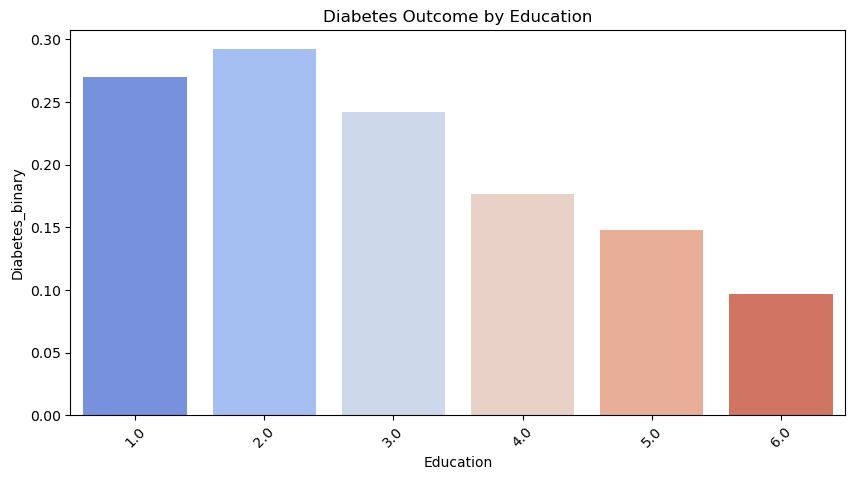

In [11]:
plot_outcome_by_group(df, 'Education', 'Diabetes_binary')

Figure 3: This shows that people with less education are more likely to be suceptible to diabetes.

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_24836/3115474330.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group_column, y=outcome_column, ci=None, palette='coolwarm')


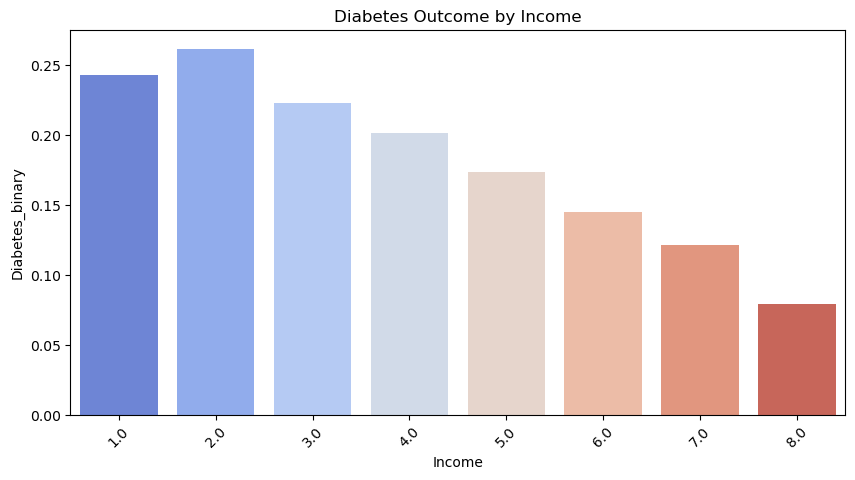

In [12]:
plot_outcome_by_group(df, 'Income', 'Diabetes_binary')

Figure 4: This also shows that people with a lower income are more suceptible to diabetes than people with higher ones. 

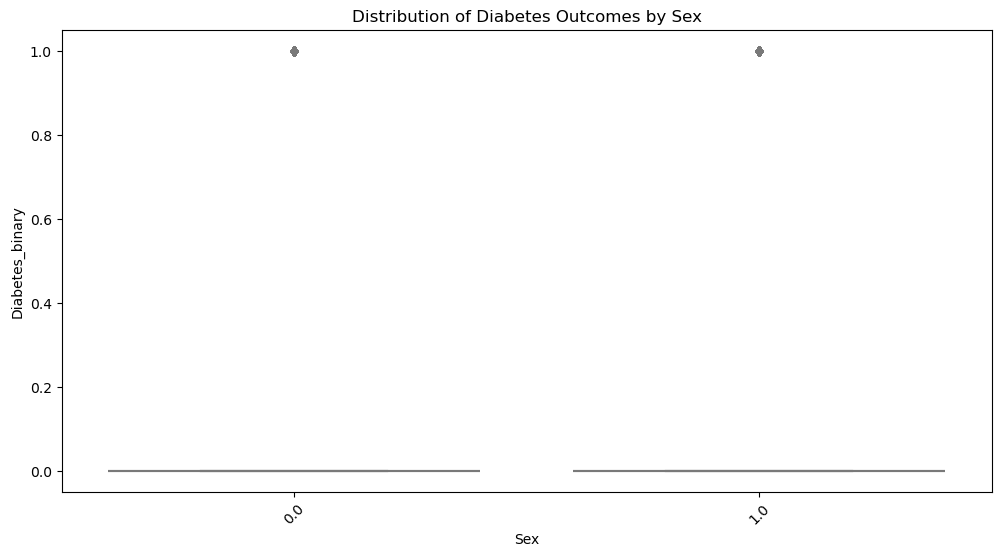

In [13]:
# Boxplot to analyze variability in diabetes outcomes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sex', y='Diabetes_binary', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Diabetes Outcomes by Sex')
plt.show()

In [14]:
# Checking for disparities
print(df.groupby('Sex')['Diabetes_binary'].describe())
print(df.groupby('Age')['Diabetes_binary'].describe())
print(df.groupby('Education')['Diabetes_binary'].describe())
print(df.groupby('Income')['Diabetes_binary'].describe())

        count      mean       std  min  25%  50%  75%  max
Sex                                                       
0.0  141974.0  0.129679  0.335951  0.0  0.0  0.0  0.0  1.0
1.0  111706.0  0.151603  0.358638  0.0  0.0  0.0  0.0  1.0
        count      mean       std  min  25%  50%  75%  max
Age                                                       
1.0    5700.0  0.013684  0.116187  0.0  0.0  0.0  0.0  1.0
2.0    7598.0  0.018426  0.134494  0.0  0.0  0.0  0.0  1.0
3.0   11123.0  0.028230  0.165636  0.0  0.0  0.0  0.0  1.0
4.0   13823.0  0.045287  0.207940  0.0  0.0  0.0  0.0  1.0
5.0   16157.0  0.065049  0.246620  0.0  0.0  0.0  0.0  1.0
6.0   19819.0  0.087895  0.283150  0.0  0.0  0.0  0.0  1.0
7.0   26314.0  0.117352  0.321845  0.0  0.0  0.0  0.0  1.0
8.0   30832.0  0.138265  0.345184  0.0  0.0  0.0  0.0  1.0
9.0   33244.0  0.172452  0.377779  0.0  0.0  0.0  0.0  1.0
10.0  32194.0  0.203703  0.402757  0.0  0.0  0.0  0.0  1.0
11.0  23533.0  0.218459  0.413209  0.0  0.0  0.0  0.0  1

Some of the takeaways from this is that women seem to have a higher prevalence to diabetes than men. Men=0 and Women = 1.  According to some research I did, this could be related to women being more susceptible to obesity-related implications which contribute to increased diabetes risk. 

/Users/sebastiansegura/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


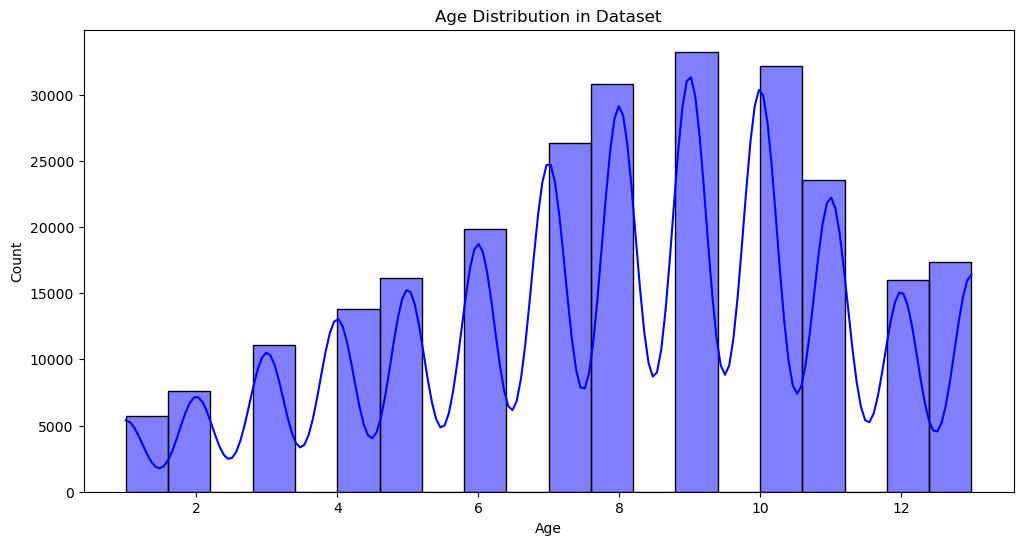

In [15]:
# Handling Age as a Continuous Variable
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution in Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
# Normalizing Income and Education Levels
df['Income'] = (df['Income'] - df['Income'].mean()) / df['Income'].std()
df['Education'] = (df['Education'] - df['Education'].mean()) / df['Education'].std()

In [17]:
# Chi-Square Test for Sex and Diabetes Outcome
contingency_table = pd.crosstab(df['Sex'], df['Diabetes_binary'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test Results for Sex and Diabetes:\nChi2: {chi2}, p-value: {p}")

Chi-Square Test Results for Sex and Diabetes:
Chi2: 250.4136677541282, p-value: 2.1098747365768505e-56


In [18]:
# Chi-Square Test for Age and Diabetes Outcome
contingency_table_age = pd.crosstab(df['Age'], df['Diabetes_binary'])
chi2_age, p_age, dof_age, expected_age = stats.chi2_contingency(contingency_table_age)
print(f"Chi-Square Test Results for Age and Diabetes:\nChi2: {chi2_age}, p-value: {p_age}")

Chi-Square Test Results for Age and Diabetes:
Chi2: 8795.050613599169, p-value: 0.0


In [19]:
# Chi-Square Test for Education and Diabetes Outcome
contingency_table_education = pd.crosstab(df['Education'], df['Diabetes_binary'])
chi2_education, p_education, dof_education, expected_education = stats.chi2_contingency(contingency_table_education)
print(f"Chi-Square Test Results for Education and Diabetes:\nChi2: {chi2_education}, p-value: {p_education}")

Chi-Square Test Results for Education and Diabetes:
Chi2: 4027.112281861301, p-value: 0.0


In [20]:
# Chi-Square Test for Income and Diabetes Outcome
contingency_table_income = pd.crosstab(df['Income'], df['Diabetes_binary'])
chi2_income, p_income, dof_income, expected_income = stats.chi2_contingency(contingency_table_income)
print(f"Chi-Square Test Results for Income and Diabetes:\nChi2: {chi2_income}, p-value: {p_income}")

Chi-Square Test Results for Income and Diabetes:
Chi2: 7003.715090707579, p-value: 0.0


In [21]:
# Logistic Regression for Predicting Diabetes Outcome
X = df[['Sex', 'Age', 'Education', 'Income']]
X = sm.add_constant(X)
y = df['Diabetes_binary']
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.374950
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253675
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                 0.07133
Time:                        21:08:02   Log-Likelihood:                -95117.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5071      0.022   -162.325      0.000      -3.549      -3.465
Sex            0.3454      0.

/Users/sebastiansegura/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


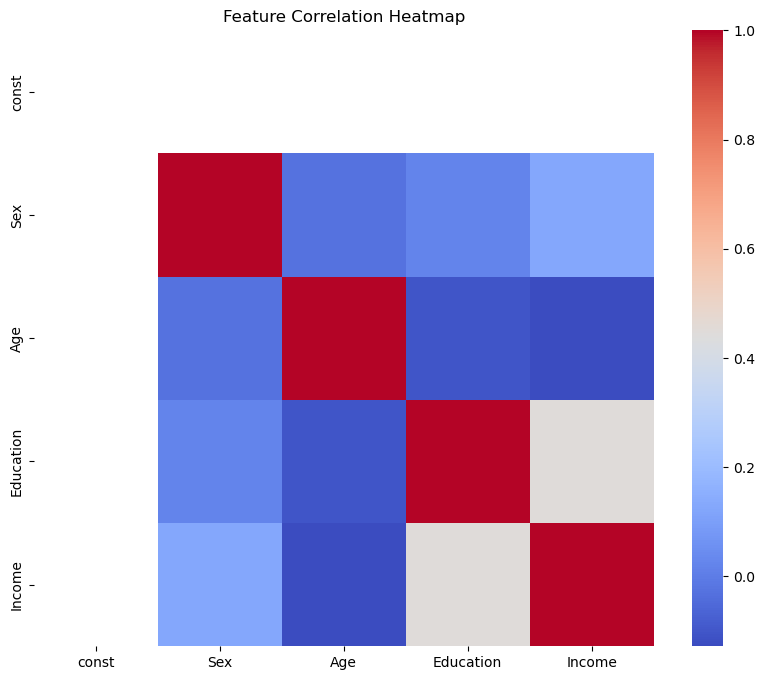

In [22]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

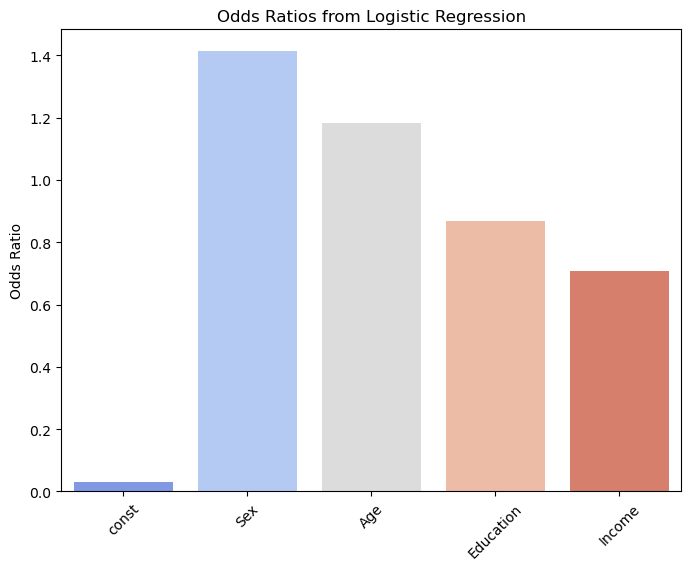

In [23]:
# Odds Ratios Plot
odds_ratios = np.exp(model.params)
plt.figure(figsize=(8, 6))
sns.barplot(x=odds_ratios.index, y=odds_ratios.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Odds Ratios from Logistic Regression')
plt.ylabel('Odds Ratio')
plt.show()

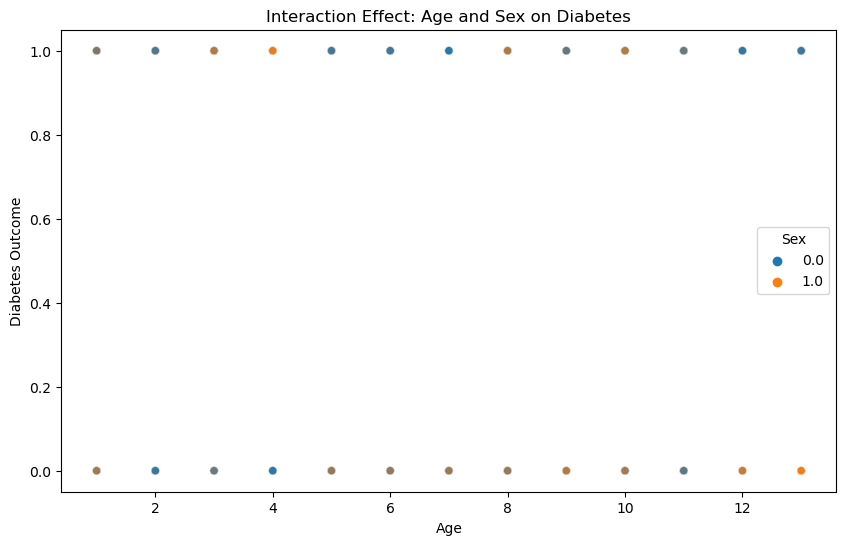

In [24]:
# Scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Diabetes_binary'], hue=df['Sex'], alpha=0.5)
plt.title('Interaction Effect: Age and Sex on Diabetes')
plt.xlabel('Age')
plt.ylabel('Diabetes Outcome')
plt.legend(title='Sex')
plt.show()